## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [3]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from model import PlacementProcedure, generateInputs
from model import generateInputs, BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [1]:
inputs = {'v': [(188, 28, 58),
  (188, 28, 58),
  (188, 28, 58),
  (188, 28, 58),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (61, 9, 79),
  (260, 39, 80)],
 'V': [(589, 235, 239), (1208, 235, 239)]}
print('number of boxes:',len(inputs['v']))


number of boxes: 10


In [4]:
start_time = time.time()

model = BRKGA(inputs, num_generations = 35, num_individuals=70, num_elites = 10, num_mutants = 7, eliteCProb = 0.7)
model.fit(patient = 15,verbose = True)
print(model)
print('used bins:',model.used_bins)
print('time:',time.time() - start_time)


Initial Population:
  ->  shape: (70, 20)
  ->  Best Fitness: 1.0679934228474584
Generation : 0  	(Best Fitness: 1.0679934228474584 )
Generation : 1  	(Best Fitness: 1.0679934228474584 )
Generation : 2  	(Best Fitness: 1.0679934228474584 )
Generation : 3  	(Best Fitness: 1.0679934228474584 )
Generation : 4  	(Best Fitness: 1.0679934228474584 )
Generation : 5  	(Best Fitness: 1.0679934228474584 )
Generation : 6  	(Best Fitness: 1.0679934228474584 )
Generation : 7  	(Best Fitness: 1.0679934228474584 )
Generation : 8  	(Best Fitness: 1.0679934228474584 )
Generation : 9  	(Best Fitness: 1.0679934228474584 )
Generation : 10  	(Best Fitness: 1.0679934228474584 )
Generation : 11  	(Best Fitness: 1.0679934228474584 )
Generation : 12  	(Best Fitness: 1.0679934228474584 )
Generation : 13  	(Best Fitness: 1.0679934228474584 )
Generation : 14  	(Best Fitness: 1.0679934228474584 )
Generation : 15  	(Best Fitness: 1.0679934228474584 )
Early stop at iter 16 (timeout)
used bins: 1
time: 10.6034936904

In [5]:
inputs['solution'] = model.solution
decoder = PlacementProcedure(inputs, model.solution)
print('fitness:',decoder.evaluate())

fitness: 1.0679934228474584


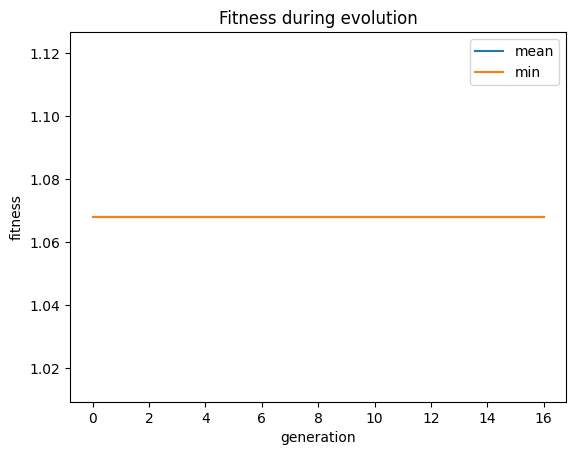

In [6]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-')
    plt.show()

plot_history(model.history)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

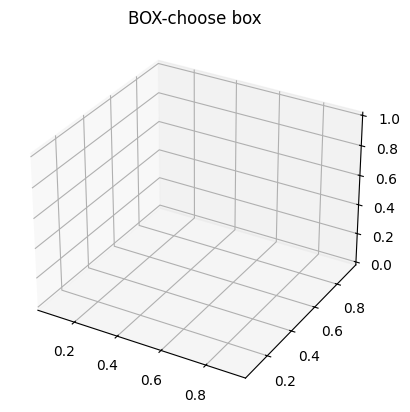

In [7]:
from plot import plot_3D

def draw(decoder):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=inputs['V'][0])
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container', i, ':')
        container.findOverlapping()
        container.show()

draw(decoder)